<img src="https://iili.io/2nepDYl.png">

#### Este conjunto de dados fornece uma vis√£o geral detalhada das rotinas de exerc√≠cios, atributos f√≠sicos e m√©tricas de condicionamento f√≠sico dos membros da academia. Ele cont√©m 973 amostras de dados de academia, incluindo indicadores-chave de desempenho, como frequ√™ncia card√≠aca, calorias queimadas e dura√ß√£o do treino. Cada entrada tamb√©m inclui dados demogr√°ficos e n√≠veis de experi√™ncia, permitindo uma an√°lise abrangente dos padr√µes de condicionamento f√≠sico, progress√£o do atleta e tend√™ncias de sa√∫de.

   <a id='top'></a>
<div class="list-group" id="list-tab" role="tablist">
<p style="background-color:#682F2F;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">SUM√ÅRIO</p>   
    
* [1. IMPORTA√á√ÉO DAS BIBLIOTECAS](#1)
    
* [2. CARREGAMENTO DOS DADOS](#2)
    
* [3. LIMPEZA DOS DADOS](#3)
    
* [4. A DEFINIR](#4)   
    
* [5. A DEFINIR](#5)
      
* [6. A DEFINIR](#6)
    
* [7. A DEFINIR](#7)
    
* [8. A DEFINIR](#8)
    
* [9. A DEFINIR](#9)
    
* [10. A DEFINIR](#10)


### IMPORTA√á√ÉO DAS BIBLIOTECAS

In [83]:
# Importando as bibliotecas necess√°rias

## >> TRABALHA COM DADOS
import numpy as np               # Biblioteca para manipula√ß√£o de arrays e fun√ß√µes matem√°ticas
import pandas as pd              # Biblioteca para manipula√ß√£o de dados em formato de DataFrames

## >> TRABALHA COM GR√ÅFICOS
import matplotlib                # Biblioteca para criar visualiza√ß√µes gr√°ficas
import matplotlib.pyplot as plt  # Sub-biblioteca do Matplotlib para visualiza√ß√µes simples
from matplotlib import colors    # Ferramentas de cores para gr√°ficos
import seaborn as sns            # Biblioteca para visualiza√ß√µes estat√≠sticas
import matplotlib.pyplot as plt, numpy as np     # Reimportando, para visualiza√ß√µes e manipula√ß√£o de arrays
from mpl_toolkits.mplot3d import Axes3D          # Biblioteca para criar gr√°ficos em 3D
from matplotlib.colors import ListedColormap     # Ferramenta para criar mapas de cores personalizados

## >> TRABALHA COM PRE PROCESSAMENTO
from sklearn.preprocessing import LabelEncoder  # Classe para codifica√ß√£o de r√≥tulos (labels)
from sklearn.preprocessing import StandardScaler  # Classe para padroniza√ß√£o dos dados

## >> TRABALHA COM MODELO DE ML
from sklearn.decomposition import PCA            # Classe para redu√ß√£o de dimensionalidade (An√°lise de Componentes Principais)
from yellowbrick.cluster import KElbowVisualizer  # Visualizador para encontrar o n√∫mero ideal de clusters
from sklearn.cluster import KMeans               # Algoritmo K-Means para clustering
from sklearn.cluster import AgglomerativeClustering  # Algoritmo de clustering hier√°rquico

## >> TRABALHA COM AVALIAR O MODELO
from sklearn import metrics                      # M√©tricas para avalia√ß√£o de modelos


## >> TRABALHA COM OUTRAS BIBLIOTECAS
import datetime                                  # Biblioteca para trabalhar com datas e hor√°rios
import warnings                                  # Biblioteca para gerenciar avisos
import sys                                       # Biblioteca para manipula√ß√£o do sistema

# Ignorando avisos para evitar distra√ß√µes no output
if not sys.warnoptions:
    warnings.simplefilter("ignore")

# Fixando o valor da semente para garantir a reprodutibilidade dos resultados
np.random.seed(42)


### CARREGAMENTO DOS DADOS

In [84]:
# Carregando o dataset
data = pd.read_csv("gym_members_exercise_tracking.csv")
data.columns

Index(['Age', 'Gender', 'Weight (kg)', 'Height (m)', 'Max_BPM', 'Avg_BPM',
       'Resting_BPM', 'Session_Duration (hours)', 'Calories_Burned',
       'Workout_Type', 'Fat_Percentage', 'Water_Intake (liters)',
       'Workout_Frequency (days/week)', 'Experience_Level', 'BMI'],
      dtype='object')

In [85]:
# Lista de colunas traduzidas para o portugu√™s
colunas = ['Idade', 
           'G√™nero', 
           'Peso (kg)', 
           'Altura (m)', 
           'Max BPM', 
           'M√©dia BPM', 
           'Repouso BPM', 
           'Dura√ß√£o Sess√£o (horas)', 
           'Calorias queimadas',
           'Tipo de Treino',
           'Percentual de Gordura',
           'Ingest√£o de √Ågua (litro)',
           'Frequ√™ncia de Treino (dia/semana)',
           'N√≠vel de Experi√™ncia',
           'IMC'
]

data.columns = colunas

print("N√∫mero de pontos de dados:", len(data))

N√∫mero de pontos de dados: 973


### Explica√ß√£o de cada coluna
#### Idade: Idade do membro da academia.
#### G√™nero: G√™nero do frequentador da academia (Masculino ou Feminino).
#### Peso (kg): Peso do membro em quilogramas.
#### Altura (m): Altura do membro em metros.
#### Max BPM: Frequ√™ncia card√≠aca m√°xima (batimentos por minuto) durante as sess√µes de treino.
#### M√©dia BPM: Frequ√™ncia card√≠aca m√©dia durante sess√µes de treino.
#### Repouso BPM: Frequ√™ncia card√≠aca em repouso antes do treino.
#### Dura√ß√£o Sess√£o (horas): Dura√ß√£o de cada sess√£o de treino em horas.
#### Calorias queimadas: Total de calorias queimadas durante cada sess√£o.
#### Tipo de Treino: Tipo de treino realizado (por exemplo, Cardio, For√ßa, Yoga, HIIT).
#### Percentual de Gordura: percentual de gordura corporal do membro.
#### Ingest√£o de √Ågua (litro): Ingest√£o di√°ria de √°gua durante os treinos.
#### Frequ√™ncia de Treino (dia/semana): N√∫mero de sess√µes de treino por semana.
#### N√≠vel de Experi√™ncia: N√≠vel de experi√™ncia, de iniciante (1) a especialista (3).
#### IMC: √çndice de Massa Corporal, calculado a partir da altura e do peso.

In [86]:
data.head()

Idade  G√™nero  Peso (kg)  Altura (m)  Max BPM  M√©dia BPM  Repouso BPM  \
0     56    Male       88.3        1.71      180        157           60   
1     46  Female       74.9        1.53      179        151           66   
2     32  Female       68.1        1.66      167        122           54   
3     25    Male       53.2        1.70      190        164           56   
4     38    Male       46.1        1.79      188        158           68   

   Dura√ß√£o Sess√£o (horas)  Calorias queimadas Tipo de Treino  \
0                    1.69              1313.0           Yoga   
1                    1.30               883.0           HIIT   
2                    1.11               677.0         Cardio   
3                    0.59               532.0       Strength   
4                    0.64               556.0       Strength   

   Percentual de Gordura  Ingest√£o de √Ågua (litro)  \
0                   12.6                       3.5   
1                   33.9                       2.1   
2                   33.4                       2.3   
3                   28.8                       2.1   
4                   29.2                       2.8   

   Frequ√™ncia de Treino (dia/semana)  N√≠vel de Experi√™ncia    IMC  
0                                  4                     3  30.20  
1                                  4                     2  32.00  
2                                  4                     2  24.71  
3                                  3                     1  18.41  
4                                  3                     1  14.39

In [87]:
data.shape[0]

print("Temos {} linhas e {} colunas no dataset.".format(data.shape[0], data.shape[1]))

Temos 973 linhas e 15 colunas no dataset.


## LIMPEZA DOS DADOS

**Nesta se√ß√£o**
* Limpeza dos Dados

Para compreender melhor as etapas necess√°rias para limpar o dataset, vamos examinar as informa√ß√µes presentes nos dados.

In [88]:
# Informa√ß√µes sobre os atributos do dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973 entries, 0 to 972
Data columns (total 15 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Idade                              973 non-null    int64  
 1   G√™nero                             973 non-null    object 
 2   Peso (kg)                          973 non-null    float64
 3   Altura (m)                         973 non-null    float64
 4   Max BPM                            973 non-null    int64  
 5   M√©dia BPM                          973 non-null    int64  
 6   Repouso BPM                        973 non-null    int64  
 7   Dura√ß√£o Sess√£o (horas)             973 non-null    float64
 8   Calorias queimadas                 973 non-null    float64
 9   Tipo de Treino                     973 non-null    object 
 10  Percentual de Gordura              973 non-null    float64
 11  Ingest√£o de √Ågua (litro)           973 non-null    


**A partir do resultado acima, podemos concluir e observar que:**

* N√£o existem valores ausentes na coluna de renda
* Existem algumas vari√°veis categ√≥ricas no nosso DataFrame (identificadas como dtype: object). Portanto, precisaremos codific√°-las em formas num√©ricas mais tarde.



### CONHECENDO OS DADOS

#### Come√ßando pelos dados categ√≥ricos (object)

In [89]:
data.select_dtypes(include=object).columns.values

array(['G√™nero', 'Tipo de Treino'], dtype=object)

In [90]:
# Distribui√ß√£o por G√™nero e Tipo de Treino
data.groupby(['G√™nero','Tipo de Treino']).size()

G√™nero  Tipo de Treino
Female  Cardio            126
        HIIT              107
        Strength          123
        Yoga              106
Male    Cardio            129
        HIIT              114
        Strength          135
        Yoga              133
dtype: int64

#### Medidas estat√≠sticas sobre os dados num√©ricos

In [91]:
data.describe().T

count        mean         std     min  \
Idade                              973.0   38.683453   12.180928   18.00   
Peso (kg)                          973.0   73.854676   21.207500   40.00   
Altura (m)                         973.0    1.722580    0.127720    1.50   
Max BPM                            973.0  179.883864   11.525686  160.00   
M√©dia BPM                          973.0  143.766701   14.345101  120.00   
Repouso BPM                        973.0   62.223022    7.327060   50.00   
Dura√ß√£o Sess√£o (horas)             973.0    1.256423    0.343033    0.50   
Calorias queimadas                 973.0  905.422405  272.641516  303.00   
Percentual de Gordura              973.0   24.976773    6.259419   10.00   
Ingest√£o de √Ågua (litro)           973.0    2.626619    0.600172    1.50   
Frequ√™ncia de Treino (dia/semana)  973.0    3.321686    0.913047    2.00   
N√≠vel de Experi√™ncia               973.0    1.809866    0.739693    1.00   
IMC                                973.0   24.912127    6.660879   12.32   

                                      25%     50%      75%      max  
Idade                               28.00   40.00    49.00    59.00  
Peso (kg)                           58.10   70.00    86.00   129.90  
Altura (m)                           1.62    1.71     1.80     2.00  
Max BPM                            170.00  180.00   190.00   199.00  
M√©dia BPM                          131.00  143.00   156.00   169.00  
Repouso BPM                         56.00   62.00    68.00    74.00  
Dura√ß√£o Sess√£o (horas)               1.04    1.26     1.46     2.00  
Calorias queimadas                 720.00  893.00  1076.00  1783.00  
Percentual de Gordura               21.30   26.20    29.30    35.00  
Ingest√£o de √Ågua (litro)             2.20    2.60     3.10     3.70  
Frequ√™ncia de Treino (dia/semana)    3.00    3.00     4.00     5.00  
N√≠vel de Experi√™ncia                 1.00    2.00     2.00     3.00  
IMC                                 20.11   24.16    28.56    49.84

In [92]:
# Configurando prefer√™ncias de cores
sns.set(rc={"axes.facecolor": "#FFF9ED", "figure.facecolor": "#FFF9ED"})  # Definindo a cor de fundo dos gr√°ficos
pallet = ["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"]
cmap = colors.ListedColormap(["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"])

<Axes: xlabel='N√≠vel de Experi√™ncia', ylabel='Calorias queimadas'>

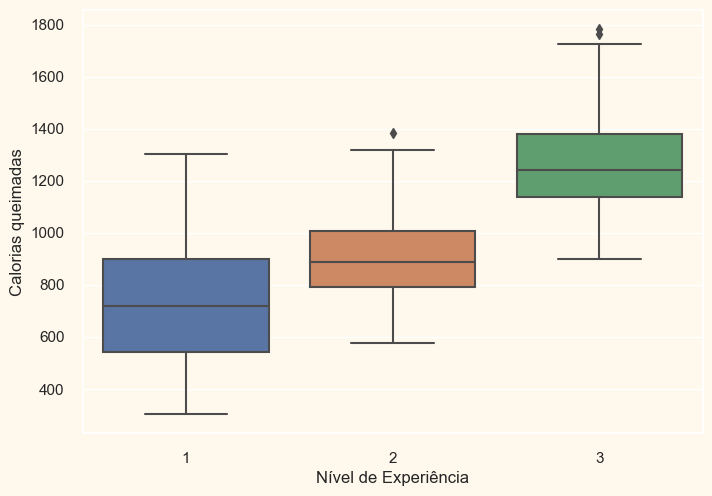

In [93]:
# O n√≠vel de experi√™ncia influencia nas calorias queimadas?
sns.boxplot(data=data, x='N√≠vel de Experi√™ncia', y='Calorias queimadas')

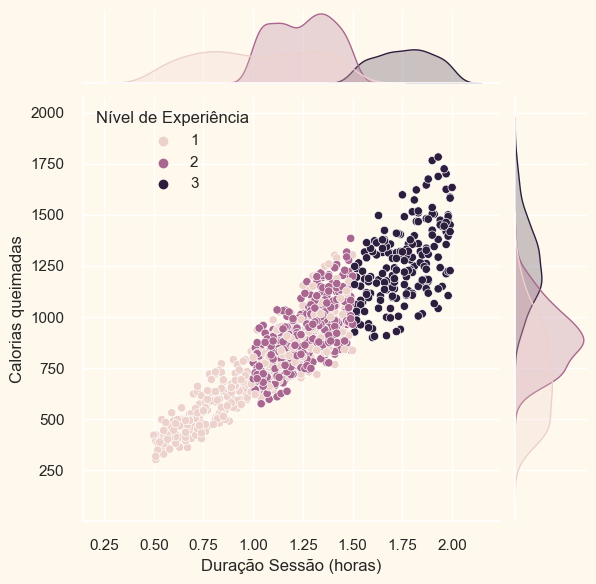

In [94]:
# A dura√ß√£o influencia nas calorias queimadas? O n√≠vel de experi√™ncia influencia na dura√ß√£o?
sns.jointplot(data=data, x='Dura√ß√£o Sess√£o (horas)', y='Calorias queimadas', hue='N√≠vel de Experi√™ncia')

<Axes: xlabel='Frequ√™ncia de Treino (dia/semana)', ylabel='Count'>

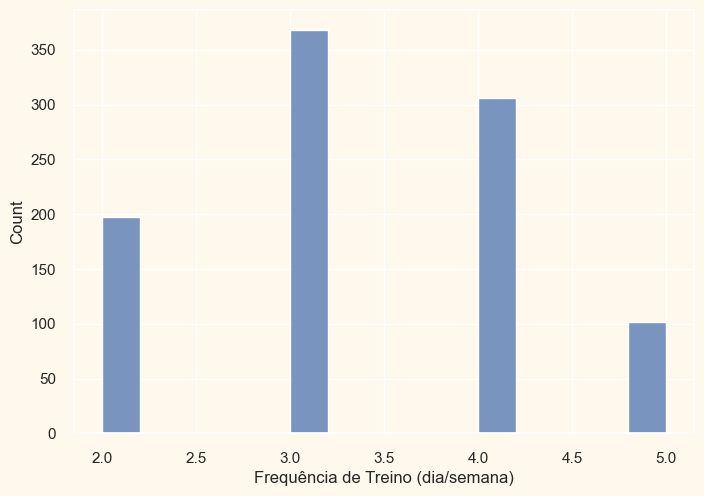

In [95]:
# Como est√° distribu√≠da a frequ√™ncia de treino?
sns.histplot(data=data, x='Frequ√™ncia de Treino (dia/semana)')

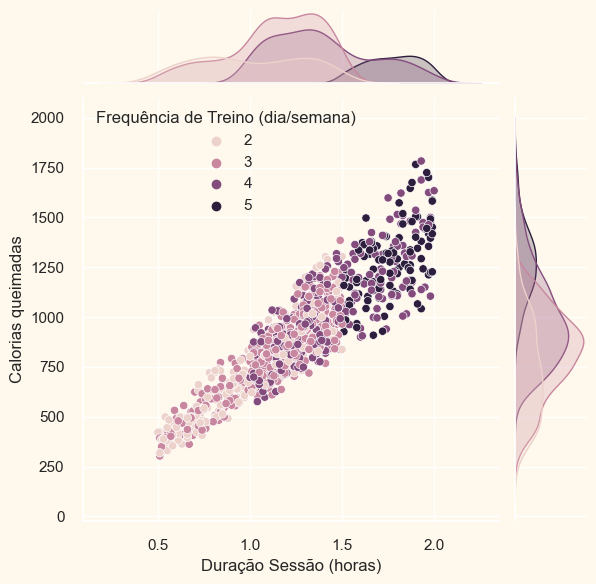

In [96]:
# Pessoas que v√£o mais na academia, possuem treinos mais longos e queimam mais calorias?
sns.jointplot(data=data, x='Dura√ß√£o Sess√£o (horas)', y='Calorias queimadas', hue='Frequ√™ncia de Treino (dia/semana)')

<Axes: >

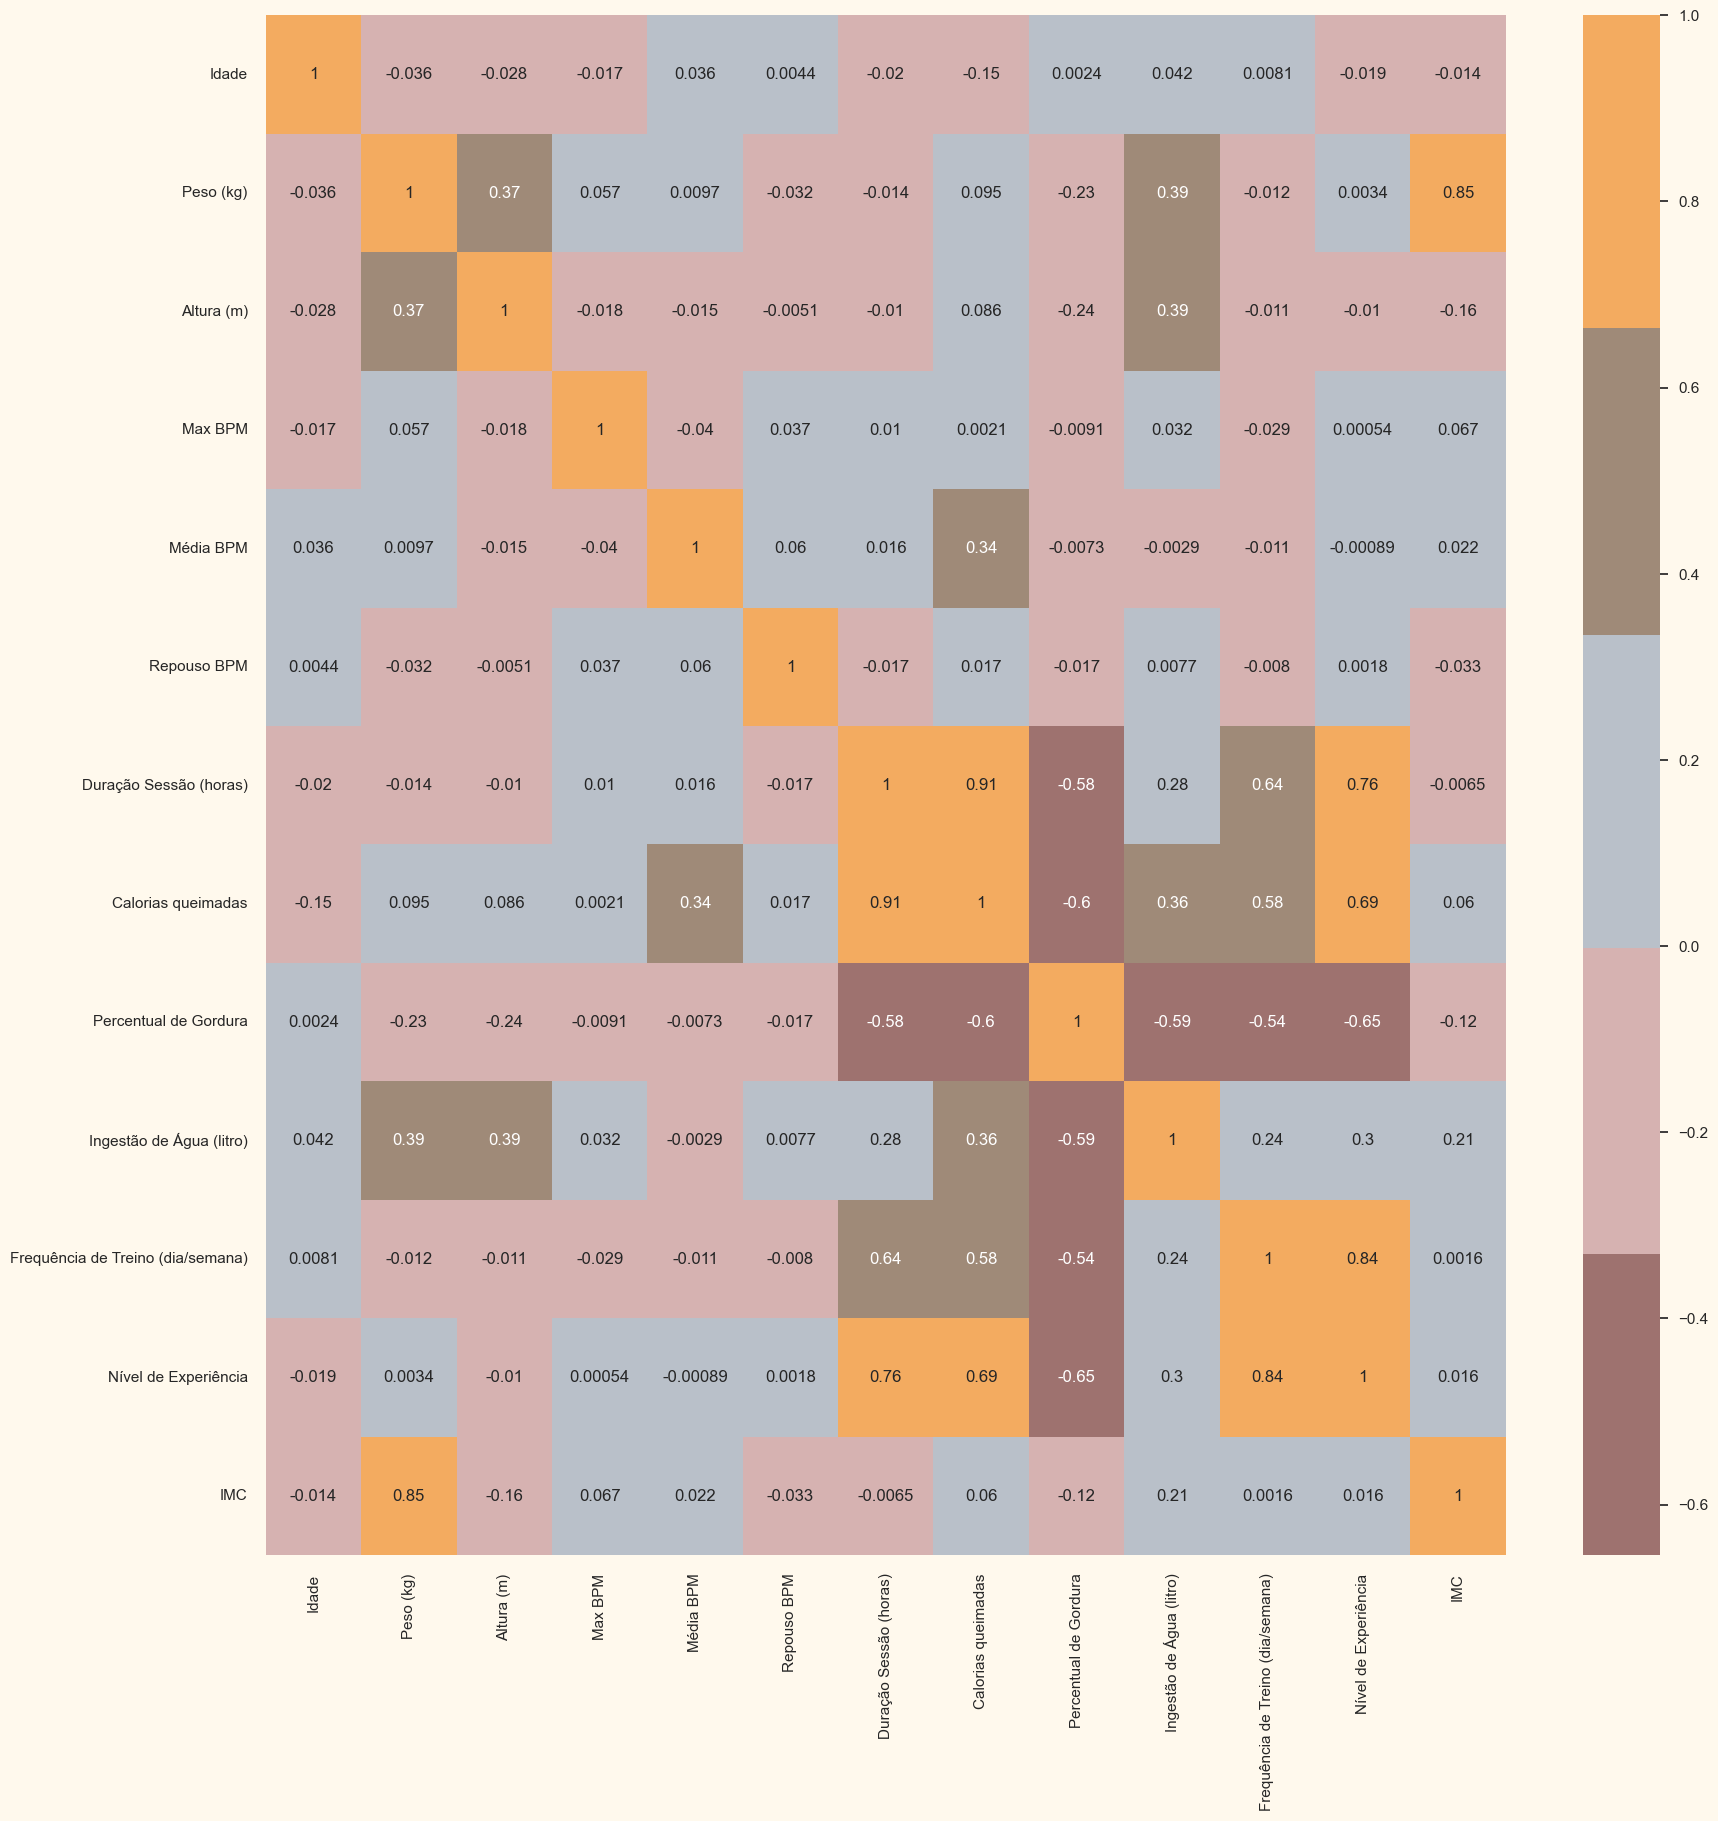

In [97]:
# Matriz de correla√ß√£o
corrmat = data.corr()  # Calcula a matriz de correla√ß√£o entre as vari√°veis num√©ricas
plt.figure(figsize=(20, 20))  # Define o tamanho do gr√°fico

# Cria o mapa de calor para visualizar as correla√ß√µes
sns.heatmap(corrmat, annot=True, cmap=cmap, center=0)
